# Import

In [3]:
!pip install torch

In [4]:
import numpy as np
import torch

# Numpy Review

## 1D Array with Numpy

In [5]:
t=np.array([0., 1., 2., 3., 4., 5., 6.]) # 1차원 numpy 배열
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [7]:
print('Rank of t: ', t.ndim) # 차원
print('Shape of t: ', t.shape) # 크기

Rank of t:  1
Shape of t:  (7,)


In [8]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # Element
print('t[2:5] t[4:-1] = ', t[2:5], t[4:-1]) # Slicing
print('t[:2] t[3:] = ', t[:2], t[3:] ) # Slicing

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1] =  [2. 3. 4.] [4. 5.]
t[:2] t[3:] =  [0. 1.] [3. 4. 5. 6.]


## 2D Array with Numpy

In [9]:
t=np.array([[1., 2., 3.], 
            [4., 5., 6.], 
            [7., 8., 9], 
            [10., 11., 12]]) # 2차원 numpy 배열
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [10]:
print('Rank of t: ', t.ndim) # 차원
print('Shape of t: ', t.shape) # 크기

Rank of t:  2
Shape of t:  (4, 3)


# PyTorch Tensor

## 1D Array with PyTorch

In [11]:
t=torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [12]:
print(t.dim()) # rank
print(t.shape) # shape
print(t.size()) # shape
print(t[0], t[1], t[-1]) # Element
print(t[2:5], t[4:-1]) # Slicing
print(t[:2], t[3:]) # Slicing

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


## 2D Array with PyTorch

In [14]:
t=torch.FloatTensor([[1., 2., 3.],
                    [4., 5., 6.], 
                    [7., 8., 9.],
                    [10., 11., 12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [15]:
print(t.dim()) # rank
print(t.size()) # shape
print(t[:,1])
print(t[:,1].size())
print(t[:,:-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## Broadcasting

In [16]:
# Same shape
m1=torch.FloatTensor([[3,3]])
m2=torch.FloatTensor([[2,2]])
print(m1+m2)

tensor([[5., 5.]])


In [17]:
# Vector + scalar
m1=torch.FloatTensor([[1,2]])
m2=torch.FloatTensor([3]) # 3 -> [[3, 3]]
print(m1+m2)

tensor([[4., 5.]])


In [18]:
# 1x2 Vector + 2x1 Vector
m1=torch.FloatTensor([[1,2]])
m2=torch.FloatTensor([[3],[4]])
print(m1+m2)

tensor([[4., 5.],
        [5., 6.]])


## Multiplication vs Matrix Multiplication

In [19]:
print()
print('-------------')
print('Mul vs Matmul')
print('-------------')
m1=torch.FloatTensor([[1,2],[3,4]])
m2=torch.FloatTensor([[1],[2]])
print('Shape of Matrix 1: ', m1.shape) # 2x2
print('Shape of Matrix 2: ', m2.shape) # 2x1
print(m1.matmul(m2))

m1=torch.FloatTensor([[1,2],[3,4]])
m2=torch.FloatTensor([[1],[2]])
print('Shape of Matrix 1: ', m1.shape) # 2x2
print('Shape of Matrix 2: ', m2.shape) # 2x1
print(m1.mul(m2))


-------------
Mul vs Matmul
-------------
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])


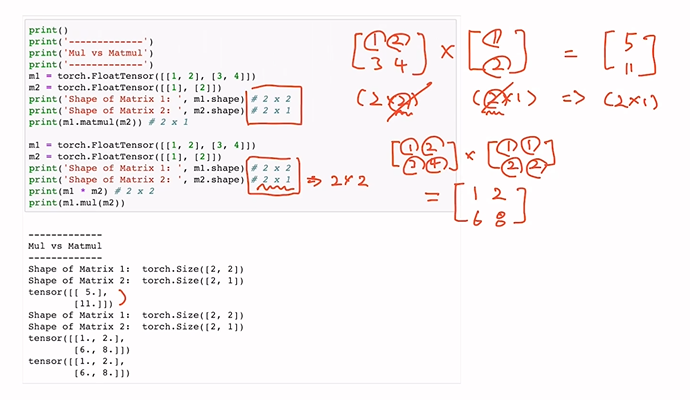

## Mean

In [20]:
t=torch.FloatTensor([1,2])
print(t.mean())

tensor(1.5000)


In [21]:
# Can't use mean() on intergers
t=torch.LongTensor([1,2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


In [23]:
t=torch.FloatTensor([[1,2],[3,4]]) # 2차원 tensor 배열
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [27]:
print(t.mean()) # 전체 평균
print(t.mean(dim=0)) # 1차원에 대한 평균
print(t.mean(dim=1)) # 2차원에 대한 평균
print(t.mean(dim=-1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


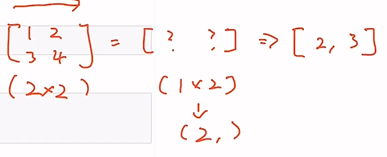
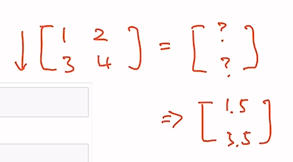

## Sum

In [29]:
t=torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [30]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


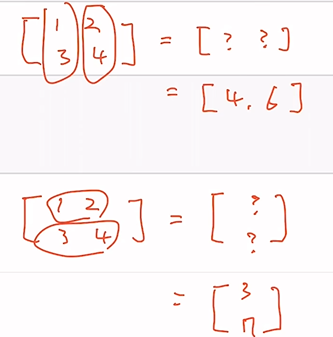

## Max and Argmax
- Max: tensor or matrix의 가장 큰 값
- Argmax: Max를 가지는 index 값

In [32]:
t=torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [33]:
print(t.max()) # Returns one value: max

tensor(4.)


In [34]:
print(t.max(dim=0)) # Returns two values: max and argmax
print('Max: ',t.max(dim=0)[0]) # 1차원에서의 최댓값
print('Argmax: ',t.max(dim=0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


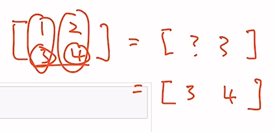

In [35]:
print(t.max(dim=1)) # 2차원에서의 최댓값
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


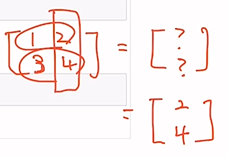

## View(Reshape)

In [36]:
t=np.array([[[0, 1, 2],
             [3, 4, 5]],
            
            [[6, 7, 8,],
             [9, 10, 11]]])

ft=torch.FloatTensor(t)
print(ft.shape) # 2x3이 2개

torch.Size([2, 2, 3])


In [37]:
print(ft.view([-1, 3])) # ?x3 으로 바꾸기
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [38]:
print(ft.view([-1, 1, 3])) # ?x1x3 으로 바꾸기
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


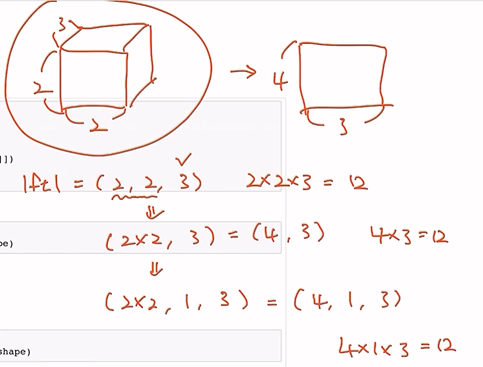

## Squeeze

In [39]:
ft=torch.FloatTensor([[0],[1],[2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [40]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


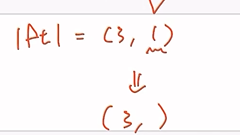

## Unsqueeze

In [42]:
ft=torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [44]:
print(ft.unsqueeze(0)) # size의 0번 자리를 1로 만들기
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


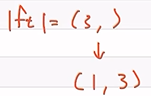

In [45]:
print(ft.view(1,-1)) # 1x? 크기로 바꾸기
print(ft.view(1,-1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [46]:
print(ft.unsqueeze(1)) # size의 1번 자리를 1로 만들기
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [47]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


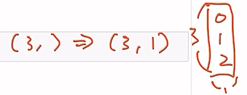

## Type Casting

In [48]:
lt=torch.LongTensor([1,2,3,4]) # Long type
print(lt)

tensor([1, 2, 3, 4])


In [49]:
print(lt.float()) # float으로 변경

tensor([1., 2., 3., 4.])


In [50]:
bt=torch.ByteTensor([True, False, True, False]) # Byte type
print(bt)

tensor([1, 0, 1, 0], dtype=torch.uint8)


In [51]:
print(bt.long()) # long으로 변경
print(bt.float()) # float으로 변경

tensor([1, 0, 1, 0])
tensor([1., 0., 1., 0.])


## Concatenate

In [52]:
x=torch.FloatTensor([[1,2],[3,4]])
y=torch.FloatTensor([[5,6],[7,8]])

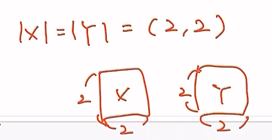

In [53]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


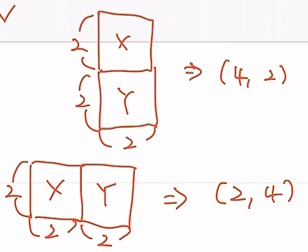

## Stacking

In [54]:
x=torch.FloatTensor([1, 4])
y=torch.FloatTensor([2, 5])
z=torch.FloatTensor([3, 6])

In [55]:
print(torch.stack([x,y,z])) # 기본값 dim=0
print(torch.stack([x,y,z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


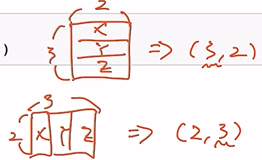

In [57]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


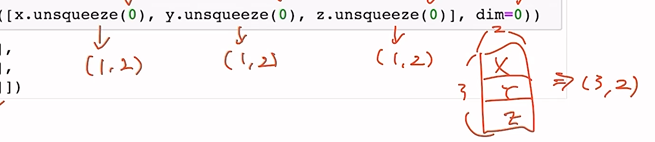

## Ones and Zeros

In [58]:
x=torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [59]:
print(torch.ones_like(x)) # x와 같은 크기의 1로 가득 찬 배열
print(torch.zeros_like(x)) # x와 같은 크기의 0으로 가득 찬 배열

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## In-place Operation

In [60]:
x=torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # x * 2
print(x)
print(x.mul_(2.)) # x * 2 결과값을 x에 반영
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
